# Comparing Classification algorithms

The list of classification algorithms that will be used to make a suit are:

1. Logistic regression

2. Naive Bayes

3. Decision tree

4. K nearest neighbor

5. Support vector Regression

One of the robust method to compare the performances of different models is by using cross validation technique. Cross validation provides a good estimate on how model will perform on unseen data. Under this method,  data is divided into  k subsets of data(also known as folds). Training is done on (k-1) subsets of data and model evaluation is done on the subset that was not used for training. This process is repeated k times, with a different subset reserved for evaluation (and excluded from training) each time. The technique provides better confidence on models performance on an unseen data. 

The key steps followed in this tutorial to make you learn how to use cross validation to discover the best performing model for a given data set as detailed below:

1. Load libraries

2. Load data set

3. Divide data set into training and test set
        - 80% training
        - 20% test set

4. Create suit of classification algorithms

5. Apply cross validation on each algorithm in suit using training set

6. Find the algorithm based on accuracy score 

7. Use the chosen algorithm on the test set to make prediction on unseen data

8. Interpret model performance using confusion matrix, precision, recall, accuracy, F1 Score and ROC curve 


The key learning are : 

1. Building suit of classification algorithms

2. Train algorithms in suit using cross validation

3. Interpreting the performace of models in suit on each cross validation iteration

4. Visualizing performance of models

5. Choosing the model based on average performance of cross validation iteration against each model in the suit

6. Using the chosen model to make predictions

7. Interpreting performance of chosen model


The data set used in this tutorial is taken from medical domain. The name of the data set is  'heart disease'  taken from https://www.kaggle.com/ronitf/heart-disease-uci. The size of the data set is (303 x 14). The aim is to predict if the person will suffer from heart disease based on various symptoms presented as 13 indicator features in the data set. It is a binary classification data set. 


The step by step is demonstrated is demonstrated below

# 1. Import libraries

In [ ]:
# importing Pandas for data manipulation
import pandas as pd
import numpy as np

# importing classification models
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# importing matplotlib for visualization
from matplotlib.pyplot import boxplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing method to perform cross validation
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#importing methods for model evaluation
from sklearn import metrics

# 2. Load data set

In [ ]:
dataset = pd.read_csv("Data sets/heart.csv")
dataset.info()

All features are numerical in nature. The feature named "target" is the class variable. 

# 3. Building training and test sets

The training set will be used for cross validation evaluation. Whereas, test set will be used for predictive task by the best performing model discovered by cross validation technique

In [ ]:
# My_data contains all data points from My_data set from from first feature to 12th feature(indicator features)
My_data = dataset.iloc[:,0:13] 

# My_target contains class information which is 13th feature in the data set of 

My_data_target=dataset.iloc[:,13]


X_train, X_test, Y_train, Y_test = train_test_split(My_data, My_data_target, test_size=0.8, random_state=10)

print("The sample training data without target feature\n")
print(X_train.head())
print("\nThe sample with only target feature\n")
print(Y_test.head())

# 4. Building suit of Classification Algorithm

The following code makes a suit of all classification algorithms 

In [ ]:
# creating a empty list
List_Classification_Models =[]
#  adding to list the instance of Logistic regression model
List_Classification_Models.append(('LR', LogisticRegression()))
#  adding to list the instance of KNN model
List_Classification_Models.append(('KNN', KNeighborsClassifier()))
#  adding to list the instance of SVM model
List_Classification_Models.append(('SVM', SVC()))
#  adding to list the instance of Naive Bayes model
List_Classification_Models.append(('NaiveBayes', GaussianNB()))
#  adding to list the instance of Decision tree
List_Classification_Models.append(('DT', DecisionTreeClassifier()))


List_Classification_Models is the list containing instances of classification algorithms with defualt parameters value. However, default parameter setting can be changed as per the requirement of the user. For eg. user can set number of k neighbors to 10 by using following: 
List_Classification_Models.append(('KNN', KNeighborsClassifier(n_neighbors=10))). You can print List_Classification_Models in order to see the default parameter setting of all classification models. 

# 5. Applying Cross validation on Algorithms in Suit

Using training set, the following code applies 10 cross validation and prints accuracy on each interation on every regression algorithm present in the suit.

In [ ]:
# creating empty lists to store results of cross validation and the name of the model
Model_Eval_Score =[]
Name_of_model =[]
# applying cross validation on each algorithm in suit
for name, model_detail in List_Classification_Models:
    # intiating cross validation with 10 iterations
    kfold = KFold(n_splits=10)
     # applying cross validation with 10 iterations on the training data
    CV_Results = cross_val_score(model_detail, X_train, Y_train, cv=kfold)
    # adding result of each iteration in list
    Model_Eval_Score.append(CV_Results)
    # name of the corresponding algorithm is stored as follows
    Name_of_model.append(name)

# creating DataFrame with cross validation results where each row indicates the performance 
# of the model on different cross validation iterations
CV_IterationsBy_model = pd.DataFrame(Model_Eval_Score,index=['LR','KNN', 'SVM', 'NaiveBayes', 
                                 'DT'])
print("The 10 cross validation results of each classification algoritm are: \n")
# printing the transpose of the data frame so that each column is a unique model
Table_Results_CV= pd.DataFrame(CV_IterationsBy_model.T)
print(Table_Results_CV)
print("\n")
# printing the mean of accuracy of each model
print("The mean performance of each regressor algorithm are: \n")
print(Table_Results_CV.mean())


$\textbf{Interpretation:}$

The entry in each column of CV_IterationsBy_model data frame represents the accuracy value achieved by each model on 10 iterative run of cross validation. For eg., at iteration 1, Logistic regression model resulted in 100% of accuracy and on iteration 2, the accuracy value dropped to 66.6% and so on. From the overall results, it may be concluded that Naive Bayes is the best model for the given data set with average accuracy of 78.3%. 

# 6. Comparison of Performance of Classification Algorithms using Boxplot 

In [ ]:
# boxplot algorithm comparison
Table_Results_CV.boxplot()

# 6. Applying the Model on Test set

Using cross validation technique it has been identified that Naive Bayes model will perform the best out of several classfication models on the unseen data.  So we will use Naive Bayes for the predictive task. As a first step, we fit the training data on Naive bayes and then, apply test set for prediction.  The final evaluation of model on the test set is done using various metrices such as confusion matrix, precision, recall and  accuracy.

In [ ]:
# Fitting Ridge on the Training data set

NB_model = GaussianNB()
NB_model.fit(X_train, Y_train)

# Getting prediction on train and test sets

NB_model_pred_test= NB_model.predict(X_test)



# Computing Model Accuracy

print("Accuracy:",round(metrics.accuracy_score(Y_test, NB_model_pred_test),2) * 100, "%")

print ("---------------")

# Printing confusion matrix

print ("Confusion matrix")

print ("---------------")

print(metrics.confusion_matrix(Y_test, NB_model_pred_test))

# Model detailed classification report
target_names = ['class 0', 'class 1']


print ("---------------")

print("Classification report", metrics.classification_report(Y_test, NB_model_pred_test,target_names =target_names))

$\textbf{Interpretation:}$
The model performed with 78% of accuracy on test data. Class wise Precision, recall, f1-score are also listed. Confusion matrix details TP, TN,FP and FN. For eg. TP by naive bayes is 95 and TN is 94 cases. Hence, total correct predictions by the models will be 95+94 = 189. The number of total wrong predictions are 20+34 = 54. We can represent the confusion matrix using heatmap in seaborn for better visualization and interpretation. Code below demonstrate the process of representing confusion matrix in seaborn

# 7. Plotting Confusion matrix using Seaborn 

In [ ]:
ax= plt.subplot()
Confusion_matrix=metrics.confusion_matrix(Y_test, NB_model_pred_test)
sns.heatmap(Confusion_matrix, annot=True, ax = ax, cmap="viridis"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['class 0', 'class 1']); ax.yaxis.set_ticklabels(['class 0', 'class 1']);


# 8. Plotting ROC Curve

In order to plot ROC curve, we need to use predict_proba() method with the fitted function as it returns the probability of an instance belonging to different classes. For a binary classification problem, predict_proba() returns class probabilities for each class. The first column contains the probability of the first class and the second column contains the probability of the second class. In order to plot ROC, we use the second column to the probabilities generated by predict_proba() function and pass it to  metrics.auc().

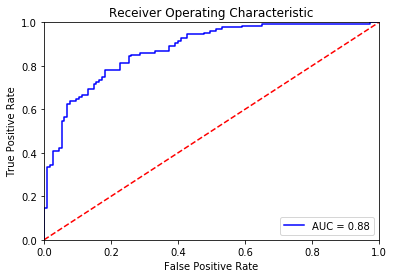

In [ ]:
NB_model_pred_prob= NB_model.predict_proba(X_test)
preds = NB_model_pred_prob[:,1]

fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
